<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Introduction to Time Series Data</span></b>
</div>

In [49]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#Libraries for Saving the Model
from pickle import dump
from pickle import load

In [50]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Load the data</span></b>
</div>

In [51]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL','AMZN']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [52]:
# base_series = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM','AMZN'))])
base_series = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM','AMZN'))]
base_series.columns = base_series.columns.droplevel()

In [53]:
base_series.head()

Symbols,GOOGL,IBM,AMZN
Date,,,
2016-03-15,750.570007,114.640419,577.020020
2016-03-16,757.359985,116.107918,574.270020
2016-03-17,758.479980,117.912178,559.440002
2016-03-18,755.409973,117.952309,552.080017
2016-03-21,762.159973,119.187241,553.979980


In [54]:
base_series.tail()

Symbols,GOOGL,IBM,AMZN
Date,,,
2021-03-09,2040.359985,124.180000,3062.850098
2021-03-10,2036.189941,127.870003,3057.639893
2021-03-11,2100.540039,127.139999,3113.590088
2021-03-12,2050.000000,127.610001,3089.489990
2021-03-15,2033.319946,128.009995,3045.554932


In [55]:
base_series.shape

(1259, 3)

In [56]:
base_series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-03-15 to 2021-03-15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   1259 non-null   float64
 1   IBM     1259 non-null   float64
 2   AMZN    1259 non-null   float64
dtypes: float64(3)
memory usage: 39.3 KB


In [57]:
# Read the Table
print(base_series[0:1].index) # To read the start date
print(base_series[0:1258].index)
print(base_series[1257:1258].index) # To read the last date of the series

DatetimeIndex(['2016-03-15'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2016-03-15', '2016-03-16', '2016-03-17', '2016-03-18',
               '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24',
               '2016-03-28', '2016-03-29',
               ...
               '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-08', '2021-03-09', '2021-03-10',
               '2021-03-11', '2021-03-12'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)
DatetimeIndex(['2021-03-12'], dtype='datetime64[ns]', name='Date', freq=None)


__Extracting the Year-month-day elements from the date index__

In [58]:
# Year
import datetime
print(base_series[0:1].index.strftime("%Y"))
print(base_series[0:1].index.strftime("%m"))
print(base_series[0:1].index.strftime("%d"))

Index(['2016'], dtype='object', name='Date')
Index(['03'], dtype='object', name='Date')
Index(['15'], dtype='object', name='Date')


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Merging data based on Date</span></b>
</div>

In [59]:
import pandas as pd
import scipy as sp
sp.random.seed(1259)
mean = 0.10
std = 0.2
ddate = pd.date_range('1/1/2017', periods=365)
n = len(ddate)
rets = sp.random.normal(mean,std,n)
data = pd.DataFrame(rets, index = ddate, columns = ['Ret'])
data.head()

,Ret
2017-01-01,-0.011165
2017-01-02,0.335871
2017-01-03,0.118184
2017-01-04,0.350766
2017-01-05,0.094212


In [60]:
data.tail()

,Ret
2017-12-27,0.139385
2017-12-28,0.072524
2017-12-29,-0.049082
2017-12-30,-0.135952
2017-12-31,0.365582


In [61]:
data.shape

(365, 1)

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Return Estimation</span></b>
</div>

In [62]:
import pandas as pd
import scipy as sp
p = [2, 2.2, 0.75, 4.98, 5.0]
# Estimated Return
a = pd.DataFrame(p, columns=['Price'])
a['Ret'] = a['Price'].diff()/a['Price'].shift(1)
a.head()

,Price,Ret
0,2.00,NaN
1,2.20,0.100000
2,0.75,-0.659091
3,4.98,5.640000
4,5.00,0.004016


In [63]:
base_series.AMZN[0:3]

Date
2016-03-15    577.020020
2016-03-16    574.270020
2016-03-17    559.440002
Name: AMZN, dtype: float64

In [64]:
base_series['AMZN_ret'] = base_series['AMZN'].diff()/base_series['AMZN'].shift(1)
base_series['IBM_ret'] = base_series['IBM'].diff()/base_series['IBM'].shift(1)

In [65]:
base_series.head()

Symbols,GOOGL,IBM,AMZN,AMZN_ret,IBM_ret
Date,,,,,
2016-03-15,750.570007,114.640419,577.020020,NaN,NaN
2016-03-16,757.359985,116.107918,574.270020,-0.004766,0.012801
2016-03-17,758.479980,117.912178,559.440002,-0.025824,0.015540
2016-03-18,755.409973,117.952309,552.080017,-0.013156,0.000340
2016-03-21,762.159973,119.187241,553.979980,0.003441,0.010470


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Converting daily returns to monthly ones</span></b>
</div>

In [66]:
base_series['AMZN'][1:].index

DatetimeIndex(['2016-03-16', '2016-03-17', '2016-03-18', '2016-03-21',
               '2016-03-22', '2016-03-23', '2016-03-24', '2016-03-28',
               '2016-03-29', '2016-03-30',
               ...
               '2021-03-02', '2021-03-03', '2021-03-04', '2021-03-05',
               '2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-15'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [67]:
base_series['AMZN'][:-1].index

DatetimeIndex(['2016-03-15', '2016-03-16', '2016-03-17', '2016-03-18',
               '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24',
               '2016-03-28', '2016-03-29',
               ...
               '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-08', '2021-03-09', '2021-03-10',
               '2021-03-11', '2021-03-12'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [68]:
# base_series['AMZN_return2'] = base_series['AMZN'][1:]/base_series['AMZN'][:-1]
base_series['AMZN_return2_log'] = np.log(base_series['AMZN']/base_series['AMZN'].shift(1))
base_series['IBM_return2_log'] = np.log(base_series['IBM']/base_series['IBM'].shift(1))
base_series.head()

Symbols,GOOGL,IBM,AMZN,AMZN_ret,IBM_ret,AMZN_return2_log,IBM_return2_log
Date,,,,,,,
2016-03-15,750.570007,114.640419,577.020020,NaN,NaN,NaN,NaN
2016-03-16,757.359985,116.107918,574.270020,-0.004766,0.012801,-0.004777,0.012720
2016-03-17,758.479980,117.912178,559.440002,-0.025824,0.015540,-0.026163,0.015420
2016-03-18,755.409973,117.952309,552.080017,-0.013156,0.000340,-0.013243,0.000340
2016-03-21,762.159973,119.187241,553.979980,0.003441,0.010470,0.003436,0.010415


In [69]:
base_series.tail()

Symbols,GOOGL,IBM,AMZN,AMZN_ret,IBM_ret,AMZN_return2_log,IBM_return2_log
Date,,,,,,,
2021-03-09,2040.359985,124.180000,3062.850098,0.037568,-0.005048,0.036880,-0.005060
2021-03-10,2036.189941,127.870003,3057.639893,-0.001701,0.029715,-0.001703,0.029282
2021-03-11,2100.540039,127.139999,3113.590088,0.018298,-0.005709,0.018133,-0.005725
2021-03-12,2050.000000,127.610001,3089.489990,-0.007740,0.003697,-0.007770,0.003690
2021-03-15,2033.319946,128.009995,3045.554932,-0.014221,0.003135,-0.014323,0.003130


In [70]:
# Remove the NA() values
base_series_new = pd.DataFrame(base_series.dropna())

In [71]:
base_series_new.head()

Symbols,GOOGL,IBM,AMZN,AMZN_ret,IBM_ret,AMZN_return2_log,IBM_return2_log
Date,,,,,,,
2016-03-16,757.359985,116.107918,574.270020,-0.004766,0.012801,-0.004777,0.012720
2016-03-17,758.479980,117.912178,559.440002,-0.025824,0.015540,-0.026163,0.015420
2016-03-18,755.409973,117.952309,552.080017,-0.013156,0.000340,-0.013243,0.000340
2016-03-21,762.159973,119.187241,553.979980,0.003441,0.010470,0.003436,0.010415
2016-03-22,760.049988,118.762215,560.479980,0.011733,-0.003566,0.011665,-0.003572


In [72]:
# yyyymm = []
# d0 = base_series_new.index

In [73]:
# d0

In [74]:
# for i in range(0, np.size(base_series_new['AMZN_return2_log'])):
#     yyyymm.append(''.join([d0[i].strftime("%Y"), d0[i].strftime("%m")]))

In [75]:
# yyyymm

In [76]:
# len(yyyymm)

In [77]:
base_series_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-03-16 to 2021-03-15
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GOOGL             1258 non-null   float64
 1   IBM               1258 non-null   float64
 2   AMZN              1258 non-null   float64
 3   AMZN_ret          1258 non-null   float64
 4   IBM_ret           1258 non-null   float64
 5   AMZN_return2_log  1258 non-null   float64
 6   IBM_return2_log   1258 non-null   float64
dtypes: float64(7)
memory usage: 78.6 KB


In [78]:
base_series_new['Date'] = base_series_new.index

In [79]:
base_series_new['month_year'] = pd.to_datetime(base_series_new['Date']).dt.to_period('M')
base_series_new.head()

Symbols,GOOGL,IBM,AMZN,AMZN_ret,IBM_ret,AMZN_return2_log,IBM_return2_log,Date,month_year
Date,,,,,,,,,
2016-03-16,757.359985,116.107918,574.270020,-0.004766,0.012801,-0.004777,0.012720,2016-03-16,2016-03
2016-03-17,758.479980,117.912178,559.440002,-0.025824,0.015540,-0.026163,0.015420,2016-03-17,2016-03
2016-03-18,755.409973,117.952309,552.080017,-0.013156,0.000340,-0.013243,0.000340,2016-03-18,2016-03
2016-03-21,762.159973,119.187241,553.979980,0.003441,0.010470,0.003436,0.010415,2016-03-21,2016-03
2016-03-22,760.049988,118.762215,560.479980,0.011733,-0.003566,0.011665,-0.003572,2016-03-22,2016-03


In [32]:
monthly_return = base_series_new['AMZN_return2_log'].groupby(base_series_new['month_year']).sum()

In [33]:
monthly_return

month_year
2016-03    0.028396
2016-04    0.105345
2016-05    0.091500
2016-06   -0.009969
2016-07    0.058602
             ...   
2020-11    0.042523
2020-12    0.027672
2021-01   -0.015699
2021-02   -0.035968
2021-03   -0.015024
Freq: M, Name: AMZN_return2_log, Length: 61, dtype: float64

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Interpolation</span></b>
</div>

In [34]:
import pandas as pd
import numpy as np
nn = np.nan
new_series = pd.Series([0.034742, 0.105345, 0.091500,-0.009969,0.058602,
                        nn,0.042523,nn,nn,-0.015699,nn,nn,nn,-0.001113])

In [35]:
print(new_series)

0     0.034742
1     0.105345
2     0.091500
3    -0.009969
4     0.058602
5          NaN
6     0.042523
7          NaN
8          NaN
9    -0.015699
10         NaN
11         NaN
12         NaN
13   -0.001113
dtype: float64


In [36]:
print(new_series.interpolate())

0     0.034742
1     0.105345
2     0.091500
3    -0.009969
4     0.058602
5     0.050562
6     0.042523
7     0.023116
8     0.003708
9    -0.015699
10   -0.012053
11   -0.008406
12   -0.004759
13   -0.001113
dtype: float64


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Test of Normality</span></b>
</div>

In [37]:
import scipy as sp
from scipy import stats
sp.random.seed(2021)
mean = 0.2
std = 0.35
n = 15000
base_series = sp.random.normal(loc=0, scale=std, size=n)

In [38]:
print('w_test & p-value')
print(stats.shapiro(base_series))

w_test & p-value
ShapiroResult(statistic=0.9998752474784851, pvalue=0.6379299759864807)


In [39]:
# Select another series
import scipy as sp
from scipy import stats
sp.random.seed(2021)
n = 15000
base_series_2 = sp.random.uniform(size = n)
print('w_test & p-value')
print(stats.shapiro(base_series_2))

w_test & p-value
ShapiroResult(statistic=0.9552866816520691, pvalue=0.0)


In [40]:
# Check it for the AMZN_ret
print(base_series_new.shape)
print(base_series_new.info())

(1258, 9)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-03-16 to 2021-03-15
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   GOOGL             1258 non-null   float64       
 1   IBM               1258 non-null   float64       
 2   AMZN              1258 non-null   float64       
 3   AMZN_ret          1258 non-null   float64       
 4   IBM_ret           1258 non-null   float64       
 5   AMZN_return2_log  1258 non-null   float64       
 6   IBM_return2_log   1258 non-null   float64       
 7   Date              1258 non-null   datetime64[ns]
 8   month_year        1258 non-null   period[M]     
dtypes: datetime64[ns](1), float64(7), period[M](1)
memory usage: 98.3 KB
None


In [41]:
print('w_test & p-value')
print(stats.shapiro(base_series_new['AMZN_ret']))

w_test & p-value
ShapiroResult(statistic=0.9353629350662231, pvalue=6.221071956720699e-23)


In [42]:
# Other tests of normality
print(stats.anderson(base_series_new['AMZN_ret']))

AndersonResult(statistic=18.594521616317934, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [43]:
help(stats.anderson)

Help on function anderson in module scipy.stats.morestats:

anderson(x, dist='norm')
    Anderson-Darling test for data coming from a particular distribution.
    
    The Anderson-Darling test tests the null hypothesis that a sample is
    drawn from a population that follows a particular distribution.
    For the Anderson-Darling test, the critical values depend on
    which distribution is being tested against.  This function works
    for normal, exponential, logistic, or Gumbel (Extreme Value
    Type I) distributions.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    dist : {'norm', 'expon', 'logistic', 'gumbel', 'gumbel_l', 'gumbel_r',
        'extreme1'}, optional
        The type of distribution to test against.  The default is 'norm'.
        The names 'extreme1', 'gumbel_l' and 'gumbel' are synonyms for the
        same distribution.
    
    Returns
    -------
    statistic : float
        The Anderson-Darling test statistic.
    criti

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Estimating fat-tails</span></b>
</div>

In [44]:
import scipy as sp
from scipy import stats, random
import numpy as np
np.random.seed(2021)
new_series = random.normal(0,1,200000)
print('mean: ',np.mean(new_series))
print('std: ',np.std(new_series))
print('skewness: ',stats.skew(new_series))
print('kurtosis: ',stats.kurtosis(new_series))

mean:  0.0007706513842724666
std:  1.00245666343976
skewness:  0.0010183203860620012
kurtosis:  0.0037787055280307236


In [45]:
print('mean: ',np.mean(base_series_new['AMZN_ret']))
print('std: ',np.std(base_series_new['AMZN_ret']))
print('skewness: ',stats.skew(base_series_new['AMZN_ret']))
print('kurtosis: ',stats.kurtosis(base_series_new['AMZN_ret']))

mean:  0.0014946097029530825
std:  0.018539234666339107
skewness:  0.3718638405685746
kurtosis:  4.983291030529145


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">t-test</span></b>
</div>

In [46]:
import scipy as sp
from scipy import stats, random
import numpy as np
np.random.seed(2021)
new_series_2 = stats.norm.rvs(size = 200000)
print("t-value & p-value (2-tail):", stats.ttest_1samp(new_series_2,0.5))
print("t-value & p-value (2-tail):", stats.ttest_1samp(new_series_2,0))

t-value & p-value (2-tail): Ttest_1sampResult(statistic=-222.71445934767846, pvalue=0.0)
t-value & p-value (2-tail): Ttest_1sampResult(statistic=0.3438003131620681, pvalue=0.7309968261200415)


In [47]:
print("Mean t-value & p-value:", round(sp.mean(base_series_new['AMZN_ret']),5),
      stats.ttest_1samp(base_series_new['AMZN_ret'],0))

Mean t-value & p-value: 0.00149 Ttest_1sampResult(statistic=2.8582725236756716, pvalue=0.004329807915570649)


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">High & Low Trading value</span></b>
</div>

In [145]:
data_path = '/Users/shovonsengupta/Desktop/All/EC-Council Course/AI_for_Finance/Section_6_Statistical_Analysis_of_Financial_Time_Series_Data/dataset'

In [93]:
nsei_data = pd.read_csv(data_path+'/NSEI.csv')
nsei_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-06,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-07,10232.950195,10243.349609,10141.549805,10154.200195,10154.200195,249500.0
2,2018-03-08,10216.250000,10270.349609,10146.400391,10242.650391,10242.650391,226400.0
3,2018-03-09,10271.299805,10296.700195,10211.900391,10226.849609,10226.849609,186500.0
4,2018-03-12,10301.599609,10433.650391,10295.450195,10421.400391,10421.400391,216400.0


In [94]:
# Remove the NA() values
nsei_data_new = pd.DataFrame(nsei_data.dropna())

In [95]:
nsei_data_new.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2018-03-07,10232.950195,10243.349609,10141.549805,10154.200195,10154.200195,249500.0
2,2018-03-08,10216.250000,10270.349609,10146.400391,10242.650391,10242.650391,226400.0
3,2018-03-09,10271.299805,10296.700195,10211.900391,10226.849609,10226.849609,186500.0
4,2018-03-12,10301.599609,10433.650391,10295.450195,10421.400391,10421.400391,216400.0
5,2018-03-13,10389.500000,10478.599609,10377.849609,10426.849609,10426.849609,266700.0


In [102]:
nsei_data_new.shape

(246, 7)

In [101]:
nsei_data_new['Date'].iloc[0]

'2018-03-07'

In [103]:
print("day, price high, price low, adj Close", 
      nsei_data_new['Date'].iloc[0],
      nsei_data_new['High'].iloc[0],
      nsei_data_new['Low'].iloc[0],
      nsei_data_new['Adj Close'].iloc[0])

day, price high, price low, adj Close 2018-03-07 10243.349609 10141.549805 10154.200195


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Estimating Roll's spread</span></b>
</div>

In [152]:
# base_series_new.head()
IBM_daily = pd.read_csv(data_path+'/IBM_daily.csv')
IBM_daily.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,98.000000,107.410004,95.000000,99.080002,93.871460,10568000
1,2020-03-17,100.610001,107.400002,97.099998,106.650002,101.043510,9258300
2,2020-03-18,99.410004,106.930000,99.400002,103.550003,98.106476,8772500
3,2020-03-19,102.330002,103.690002,98.239998,100.339996,95.065216,8396500
4,2020-03-20,100.919998,100.989998,94.709999,95.389999,90.375435,10546500


In [154]:
p = IBM_daily['Adj Close']

In [155]:
import scipy as sp
d = sp.diff(p)
cov_ = sp.cov(d[:-1],d[1:])

In [156]:
cov_

array([[ 6.53877454, -0.7588864 ],
       [-0.7588864 ,  6.33874677]])

In [158]:
if cov_[0,1] < 0:
    print('Roll Spread for IBM is: ', round(2*sp.sqrt(-cov_[0,1]),3))
else:
    print('Cov is positive for IBM: ', round(cov_[0,1],3))

Roll Spread for IBM is:  1.742


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Estimating Amihud's illequidity</span></b>
</div>

In [148]:
IBM_daily = pd.read_csv(data_path+'/IBM_daily.csv')
IBM_daily.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,98.000000,107.410004,95.000000,99.080002,93.871460,10568000
1,2020-03-17,100.610001,107.400002,97.099998,106.650002,101.043510,9258300
2,2020-03-18,99.410004,106.930000,99.400002,103.550003,98.106476,8772500
3,2020-03-19,102.330002,103.690002,98.239998,100.339996,95.065216,8396500
4,2020-03-20,100.919998,100.989998,94.709999,95.389999,90.375435,10546500


In [149]:
print(max(IBM_daily['Date']))
print(min(IBM_daily['Date']))

2021-03-12
2020-03-16


In [150]:
p = np.array(IBM_daily['Adj Close'])
dollar_vol = np.array(IBM_daily['Volume']*p)
retrn = np.array((p[1:] - p[:-1])/p[1:])
illequidity = np.mean(np.divide(abs(retrn),dollar_vol[1:]))
print('Aminud illequidity:', illequidity)

Aminud illequidity: 2.2899073355159894e-11


<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Python for very high frequency data</span></b>
</div>

In [169]:
# !pip install yfinance

[*********************100%***********************]  1 of 1 completed


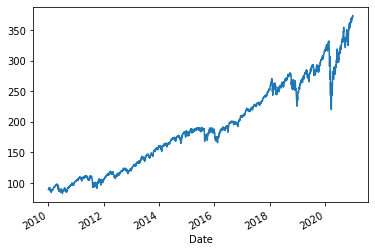

In [188]:
# Import yfinance and matplotlib
import yfinance as yf  
import matplotlib.pyplot as plt
# Get the data for the SPY ETF by specifying the stock ticker, start date, and end date
data = yf.download('SPY','2010-01-01','2021-01-01')
# Plot the close prices
data["Adj Close"].plot()
plt.show()

[*********************100%***********************]  2 of 2 completed


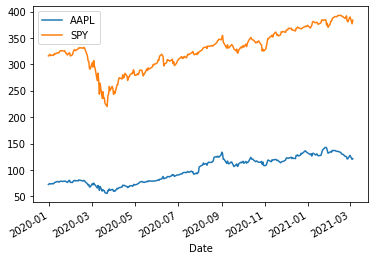

In [189]:
# Get the data for the SPY (an ETF on the S&P 500 index) and the stock Apple by specifying the stock ticker, start date, and end date
data = yf.download(['SPY', 'AAPL'],'2020-01-01','2021-03-06')
# Plot the adjusted close prices
data["Adj Close"].plot()
plt.show()

In [173]:
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date
data = yf.download(['BTC-USD', 'EURUSD=X', 'AAPL210115C00018750', 'CL=F', 'ARKK', '^TNX' ],
                   '2020-01-01','2021-03-13')
data["Adj Close"].tail()

[*********************100%***********************]  6 of 6 completed

1 Failed download:
- AAPL210115C00018750: No data found, symbol may be delisted


,AAPL210115C00018750,ARKK,BTC-USD,CL=F,EURUSD=X,^TNX
Date,,,,,,
2021-03-08,NaN,110.260002,52246.523438,65.050003,1.192563,1.596
2021-03-09,NaN,121.750000,54824.117188,64.010002,1.185171,1.546
2021-03-10,NaN,121.190002,56008.550781,64.440002,1.189791,1.520
2021-03-11,NaN,128.679993,57805.121094,66.019997,1.192606,1.527
2021-03-12,NaN,126.680000,57332.089844,65.610001,1.198610,1.635


[*********************100%***********************]  1 of 1 completed


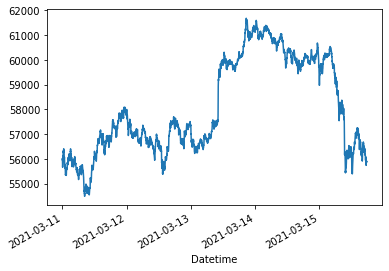

In [174]:
data = yf.download(
		tickers=['BTC-USD'], 
		# use "period" instead of start/end
		# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
		# (optional, default is '1mo')
		period="5d",
		# fetch data by interval (including intraday if period < 60 days)
		# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
       	# (optional, default is '1d')
		interval="1m")
# Plot the close prices
data.Close.plot()
plt.show()

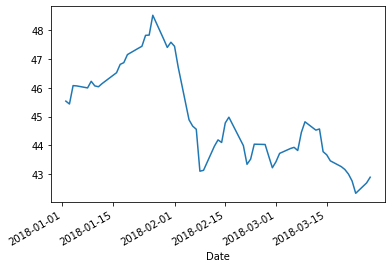

In [180]:
# Use of quantdl
# Import quandl
# !pip install quandl
import quandl
# Get the data for Coca-cola
data = quandl.get("WIKI/KO", start_date="2018-01-01", end_date="2021-01-01", api_key="********")
# Plot the prices
data.Close.plot()
plt.show()

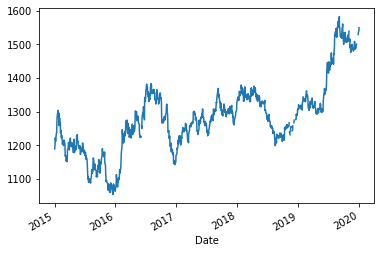

In [182]:
# Get the data for Gold Futures, Continuous Contract #6.
data = quandl.get("CHRIS/CME_GC6", start_date="2015-01-01", 
                  end_date="2020-01-01", 
                  api_key='************')
# Plot the prices
data.Last.plot()
plt.show()

In [185]:
# Some more examples
# how to get high-frequency finance data
# Define the ticker list
import pandas as pd
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2021-1-1')['Adj Close']

# Print first 5 rows of the data
print(data.head())

[*********************100%***********************]  6 of 6 completed
                  AAPL         AXP          BA         IBM         MU  \
Date                                                                    
2020-12-31  132.492020  120.487518  214.059998  124.220062  75.180000   
2021-01-04  129.216919  117.627548  202.720001  122.305649  74.050003   
2021-01-05  130.814514  118.255341  211.630005  124.476639  77.260002   
2021-01-06  126.411102  122.629997  211.029999  127.585091  77.110001   
2021-01-07  130.724655  121.660004  212.710007  127.289062  79.110001   

                   WMT  
Date                    
2020-12-31  144.149994  
2021-01-04  146.529999  
2021-01-05  145.750000  
2021-01-06  146.660004  
2021-01-07  146.649994  


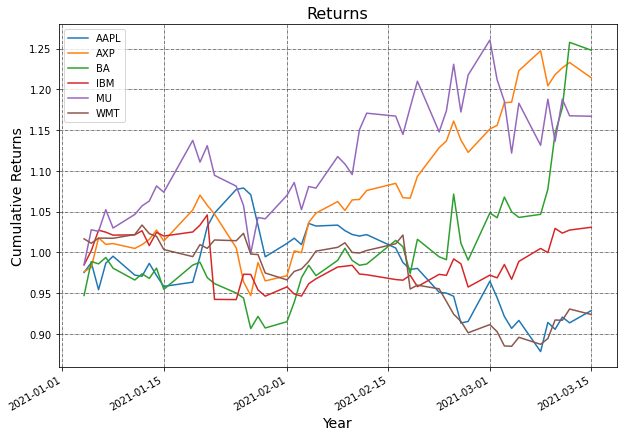

In [186]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [187]:
# Minute level data
# Import package
import yfinance as yf

# Get the data
data = yf.download(tickers="MSFT", period="5d", interval="1m")

# Print the data
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2021-03-15 13:48:00-04:00  233.129898  233.130005  233.050003  233.089996   
2021-03-15 13:49:00-04:00  233.099304  233.130005  233.050003  233.080002   
2021-03-15 13:50:00-04:00  233.080002  233.089996  232.945007  233.052094   
2021-03-15 13:51:00-04:00  233.059998  233.089996  233.020004  233.059998   
2021-03-15 13:52:44-04:00  233.050003  233.050003  233.050003  233.050003   

                            Adj Close  Volume  
Datetime                                       
2021-03-15 13:48:00-04:00  233.089996   23564  
2021-03-15 13:49:00-04:00  233.080002   30758  
2021-03-15 13:50:00-04:00  233.052094   40898  
2021-03-15 13:51:00-04:00  233.059998   29754  
2021-03-15 13:52:44-04:00  233.050003       0  


In [190]:
data.shape

(297, 12)

<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">Introduction to CRSP</span></b>
</div>

__Congratulations!__